In [1]:
import specpy
import numpy as np
import json
from matplotlib import pyplot
import time

from skimage.feature import blob_dog

from pipeline2 import AcquisitionPipeline, PipelineLevels, DefaultNameHandler
from pipeline2.util import gen_json, dump_JSON
from pipeline2.imspector.imspector import get_current_stage_coords
from pipeline2.taskgeneration import ( SpiralOffsetGenerator, JSONFileConfigLoader, 
                                      DefaultStageOffsetsSettingsGenerator,
                                      AcquisitionTaskGenerator,
                                        DefaultLocationRemover, DefaultLocationKeeper,
                                     NewestDataSelector,
                             NewestSettingsSelector,
                             ZDCOffsetSettingsGenerator,)
from pipeline2.imspector import ImspectorConnection
from pipeline2.stoppingcriteria import TimedStoppingCriterion
from pipeline2.detection import ZDCSpotPairFinder



%matplotlib inline



In [2]:
levels = PipelineLevels('overview', 'detail')

im = specpy.Imspector()

c = get_current_stage_coords(im)
sp = SpiralOffsetGenerator()
sp.withStart(c)
sp.withZOffset(c[2] + 5e-6)

atg = (AcquisitionTaskGenerator(levels.overview, 
                               DefaultLocationRemover(JSONFileConfigLoader(['C:/Users/RESOLFT/Desktop/config_json/zdc_overview.json'])),
                               DefaultStageOffsetsSettingsGenerator(sp))
       .withDelay(.5))




pipeline = AcquisitionPipeline('1')

detector = ZDCSpotPairFinder(NewestDataSelector(pipeline, levels.overview),sigma=3, thresholds = [0.5, 0.5])
detector.withPlotDetections()
atg_detail = (AcquisitionTaskGenerator(levels.detail,
                                       DefaultLocationRemover(JSONFileConfigLoader(['C:/Users/RESOLFT/Desktop/config_json/zdc_detail.json'])),
                                       DefaultLocationKeeper(NewestSettingsSelector(pipeline, levels.overview)),
                                       ZDCOffsetSettingsGenerator(detector)
                                      ))

pipeline.withPipelineLevels(levels)
pipeline.withNameHandler(DefaultNameHandler('C:/Users//RESOLFT/Desktop/TEST_GEN/', levels))
pipeline.withImspectorConnection(ImspectorConnection(im))

pipeline.withCallbackAtLevel(atg, levels.overview)
pipeline.withCallbackAtLevel(atg_detail, levels.overview)
pipeline.withAddedStoppingCondition(TimedStoppingCriterion(300))


atg(pipeline)

C:/Users//RESOLFT/Desktop/TEST_GEN/b552594fff3b4e98e2da103042342c39_overview_0.msr


StopIteration: 

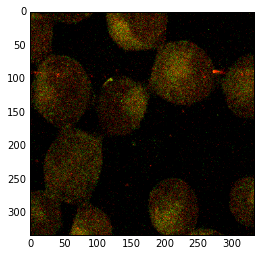

In [3]:
pipeline.run()

## Title

asas $\sum_0^1 x$

In [2]:
im = specpy.Imspector()

c = get_current_stage_coords(im)
print(c)
sp = SpiralOffsetGenerator()
sp.withStart(c)
sp.withZOffset(c[2] + 5e-6)



gen = DefaultStageOffsetsSettingsGenerator(sp)
gen = DefaultLocationKeeper(DefaultStageOffsetsSettingsGenerator(sp))

for _ in range(5):
    upd = gen()[0][0][0]
    print(upd)
    im.active_measurement().set_parameters('', upd)
    time.sleep(0.5)
    print(get_current_stage_coords(im))

[0.00024992, 0.00020008, 1.217e-05]
{'ExpControl': {'scan': {'range': {'offsets': {'coarse': {'x': {'g_off': 0.00024992}, 'z': {'g_off': 1.717e-05}, 'y': {'g_off': 0.00020008}}}}}}}
[0.00024992, 0.00020008, 1.217e-05]
{'ExpControl': {'scan': {'range': {'offsets': {'coarse': {'x': {'g_off': 0.00019992}, 'z': {'g_off': 1.717e-05}, 'y': {'g_off': 0.00029992}}}}}}}
[0.00019998, 0.00029982, 1.217e-05]
{'ExpControl': {'scan': {'range': {'offsets': {'coarse': {'x': {'g_off': 0.00024992}, 'z': {'g_off': 1.717e-05}, 'y': {'g_off': 0.00029992}}}}}}}
[0.00024984, 0.00029982, 1.217e-05]
{'ExpControl': {'scan': {'range': {'offsets': {'coarse': {'x': {'g_off': 0.00029992}, 'z': {'g_off': 1.717e-05}, 'y': {'g_off': 0.00029992}}}}}}}
[0.00029988, 0.00029986, 1.217e-05]
{'ExpControl': {'scan': {'range': {'offsets': {'coarse': {'x': {'g_off': 0.00029992}, 'z': {'g_off': 1.717e-05}, 'y': {'g_off': 0.00024992}}}}}}}
[0.00029988, 0.00024998, 1.217e-05]
